# Support Vector Machines - Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


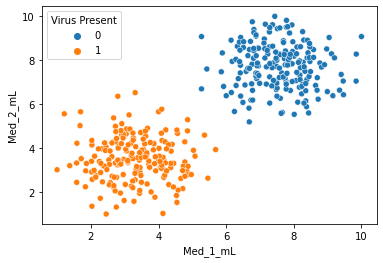

In [4]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')

## Machine Learning

We are not going to separe train/test data, because we just want to visualize how support vector machines work.

**Create X and y**

In [5]:
X = df.drop('Virus Present', axis=1)

In [6]:
y = df['Virus Present']

## Linear Kernel and the C value effect

### Create a support vector machine for classification with a large C value

In [7]:
from sklearn.svm import SVC

In [8]:
model = SVC(kernel='linear', C=1000)

In [9]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

**Plot the hyperplane, the margins and the support vectors**

In [10]:
from svm_margin_plot import plot_svm_boundary

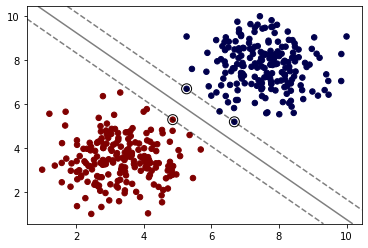

In [11]:
plot_svm_boundary(model, X, y)

### Create a support vector machine for classification with a small C value

In [12]:
model = SVC(kernel='linear', C=0.5)

In [13]:
model.fit(X, y)

SVC(C=0.5, kernel='linear')

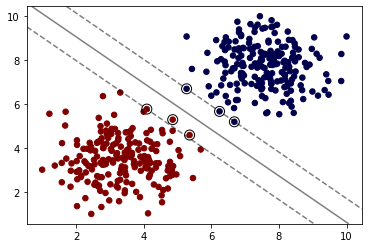

In [14]:
plot_svm_boundary(model, X, y)

### Create a support vector machine for classification with an even smaller C value

In [15]:
model = SVC(kernel='linear', C=0.005)

In [16]:
model.fit(X, y)

SVC(C=0.005, kernel='linear')

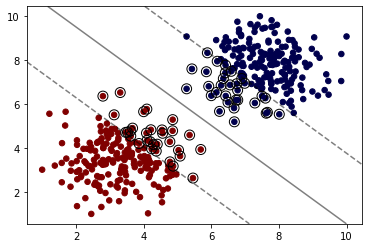

In [17]:
plot_svm_boundary(model, X, y)

Smaller values of C allow more points inside the margin.

## RBF Kernel

### C effect on rbf kernel

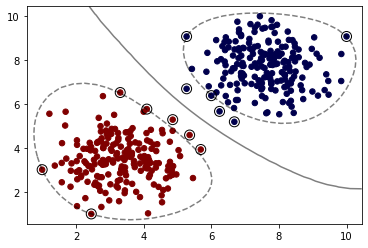

In [18]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

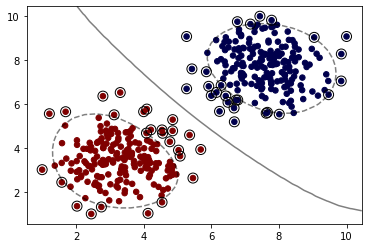

In [19]:
model = SVC(kernel='rbf', C=0.1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

### Gamma parameter

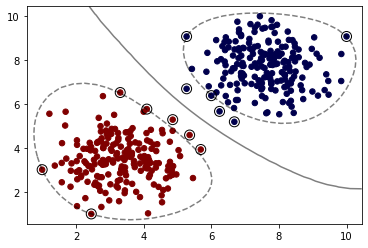

In [20]:
# Gamma scale is default
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X, y)
plot_svm_boundary(model, X, y)

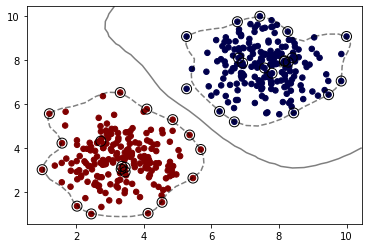

In [21]:
model = SVC(kernel='rbf', C=1, gamma='auto')
model.fit(X, y)
plot_svm_boundary(model, X, y)

Gamma auto introduces more variance to the model.

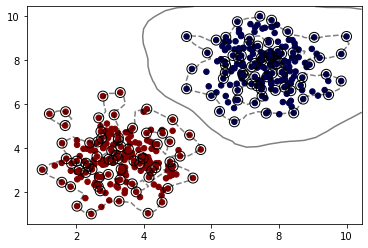

In [22]:
model = SVC(kernel='rbf', C=1, gamma=2)
model.fit(X, y)
plot_svm_boundary(model, X, y)

Large gamma values lead to overfitting.

## Sigmoid Kernel

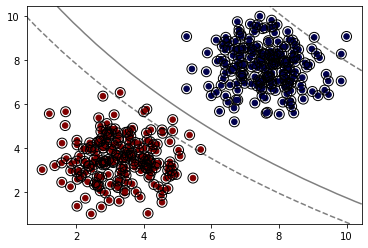

In [23]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model, X, y)

The sigmoid kernel doesn't perform well in this dataset.

## Polynomial Kernel and degree parameter

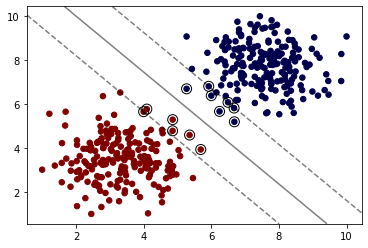

In [24]:
model = SVC(kernel='poly', C=1, degree=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

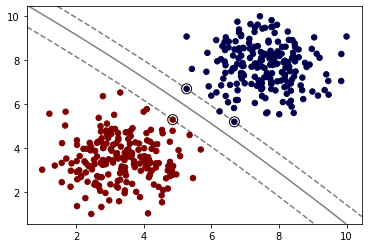

In [25]:
model = SVC(kernel='poly', C=0.05, degree=4)
model.fit(X, y)
plot_svm_boundary(model, X, y)

## Grid Search

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
svm = SVC()
param_grid = {
    'C':[0.01, 0.1, 1],
    'kernel':['linear', 'rbf']
}

In [28]:
grid = GridSearchCV(svm, param_grid)

In [29]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [30]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}